In [103]:
#importação da biblioteca
import pandas as pd
import matplotlib.pyplot as plt



In [104]:
#leitura do arquivo
#disponível em https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html
df = pd.read_excel("/content/sample_data/PIB dos Municípios - base de dados 2010-2018.xls")


In [105]:
#cabeçalho
df.head()

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,Nome da Mesorregião,Código da Microrregião,Nome da Microrregião,Código da Região Geográfica Imediata,Nome da Região Geográfica Imediata,Município da Região Geográfica Imediata,Código da Região Geográfica Intermediária,Nome da Região Geográfica Intermediária,Município da Região Geográfica Intermediária,Código Concentração Urbana,Nome Concentração Urbana,Tipo Concentração Urbana,Código Arranjo Populacional,Nome Arranjo Populacional,Hierarquia Urbana,Hierarquia Urbana (principais categorias),Código da Região Rural,Nome da Região Rural,Região rural (segundo classificação do núcleo),Amazônia Legal,Semiárido,Cidade-Região de São Paulo,"Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto
0,2010,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,NaN,1102,Leste Rondoniense,11006,Cacoal,110005,Cacoal,do Entorno,1102,Ji-Paraná,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Local,Centro Local,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,69260.391,16118.534,62496.185,93244.656,241119.767,20957.111,262076.878,10731.18,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços
1,2010,1,Norte,11,RO,Rondônia,1100023,Ariquemes,NaN,1102,Leste Rondoniense,11003,Ariquemes,110002,Ariquemes,Polo,1101,Porto Velho,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Subregional B,Centro Subregional,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,73711.643,287138.585,494946.267,343867.731,1199664.227,165029.553,1364693.780,15103.86,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...
2,2010,1,Norte,11,RO,Rondônia,1100031,Cabixi,NaN,1102,Leste Rondoniense,11008,Colorado do Oeste,110006,Vilhena,do Entorno,1102,Ji-Paraná,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Local,Centro Local,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,24300.822,3252.506,12677.210,25170.235,65400.772,4210.342,69611.114,11033.62,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços
3,2010,1,Norte,11,RO,Rondônia,1100049,Cacoal,NaN,1102,Leste Rondoniense,11006,Cacoal,110005,Cacoal,Polo,1102,Ji-Paraná,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Subregional B,Centro Subregional,5105,Região Rural do Centro Sub-regional de Vilhena...,Região Rural de Centro Sub-regional,Sim,Não,Não,95259.203,182051.537,465447.325,298454.309,1041212.374,145281.717,1186494.091,15095.15,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...
4,2010,1,Norte,11,RO,Rondônia,1100056,Cerejeiras,NaN,1102,Leste Rondoniense,11008,Colorado do Oeste,110006,Vilhena,do Entorno,1102,Ji-Paraná,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro de Zona B,Centro de Zona,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,28976.415,19734.484,80724.991

In [106]:
#linhas e colunas
df.shape

(50115, 43)

In [107]:
#tipo de dados
df.dtypes

Ano                                                                                                                                                       int64
Código da Grande Região                                                                                                                                   int64
Nome da Grande Região                                                                                                                                    object
Código da Unidade da Federação                                                                                                                            int64
Sigla da Unidade da Federação                                                                                                                            object
Nome da Unidade da Federação                                                                                                                             object
Código do Município                     

In [108]:
df.describe()

,Ano,Código da Grande Região,Código da Unidade da Federação,Código do Município,Código da Mesorregião,Código da Microrregião,Código da Região Geográfica Imediata,Código da Região Geográfica Intermediária,Código Concentração Urbana,Código Arranjo Populacional,Código da Região Rural,"Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)"
count,50115.000000,50115.000000,50115.000000,5.011500e+04,50115.000000,50115.000000,50115.000000,50115.000000,5.931000e+03,8.595000e+03,50115.000000,5.011500e+04,5.011500e+04,5.011500e+04,5.011500e+04,5.011500e+04,5.011500e+04,5.011500e+04,50115.000000
mean,2014.000898,2.897635,32.375935,3.253412e+06,3241.858725,32393.570608,323775.438551,3241.672553,3.508507e+06,3.536321e+06,3247.522897,4.428055e+04,2.018979e+05,4.656740e+05,1.442296e+05,8.560821e+05,1.424672e+05,9.985493e+05,18343.197313
std,2.581841,1.087970,9.831777,9.847022e+05,983.428843,9832.839389,98319.791137,983.605822,7.906628e+05,8.213397e+05,978.600646,7.916089e+04,1.322009e+06,6.199437e+06,1.339798e+06,8.312534e+06,1.863359e+06,1.014349e+07,20316.091531
min,2010.000000,1.000000,11.000000,1.100015e+06,1101.000000,11001.000000,110001.000000,1101.000000,1.100122e+06,1.100106e+06,1101.000000,-2.298910e+03,-2.897193e+06,1.206547e+03,4.226545e+03,-5.105931e+05,-1.508840e+04,-1.904643e+04,-1459.830000
25%,2012.000000,2.000000,25.000000,2.512101e+06,2503.000000,25015.000000,250009.000000,2503.000000,3.122306e+06,3.120904e+06,2503.000000,8.597653e+03,3.118488e+03,1.429005e+04,2.044752e+04,5.854725e+04,2.317743e+03,6.126146e+04,7713.540000
50%,2014.000000,3.000000,31.000000,3.146255e+06,3110.000000,31047.000000,310039.000000,3107.000000,3.523909e+06,3.529005e+06,3105.000000,2.142114e+04,9.904262e+03,3.725483e+04,3.901675e+04,1.286299e+05,6.993075e+03,1.362896e+05,13158.380000
75%,2016.000000,4.000000,41.000000,4.119152e+06,4106.000000,41024.000000,410019.000000,4104.000000,4.119905e+06,4.204608e+06,4103.000000,4.837685e+04,5.489390e+04,1.198531e+05,8.449529e+04,3.400672e+05,2.697188e+04,3.682787e+05,22440.355000
max,2018.000000,5.000000,53.000000,5.300108e+06,5301.000000,53001.000000,530001.000000,5301.000000,5.300108e+06,5.300108e+06,5207.000000,2.482540e+06,6.689305e+07,4.854288e+08,1.017928e+08,5.875291e+08,1.271543e+08,7.146834e+08,815697.760000


In [109]:
#ultimas linhas
df.tail()

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,Nome da Mesorregião,Código da Microrregião,Nome da Microrregião,Código da Região Geográfica Imediata,Nome da Região Geográfica Imediata,Município da Região Geográfica Imediata,Código da Região Geográfica Intermediária,Nome da Região Geográfica Intermediária,Município da Região Geográfica Intermediária,Código Concentração Urbana,Nome Concentração Urbana,Tipo Concentração Urbana,Código Arranjo Populacional,Nome Arranjo Populacional,Hierarquia Urbana,Hierarquia Urbana (principais categorias),Código da Região Rural,Nome da Região Rural,Região rural (segundo classificação do núcleo),Amazônia Legal,Semiárido,Cidade-Região de São Paulo,"Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto
50110,2018,5,Centro-oeste,52,GO,Goiás,5222005,Vianópolis,NaN,5205,Sul Goiano,52016,Pires do Rio,520002,Anápolis,do Entorno,5201,Goiânia,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Local,Centro Local,5204,Região Rural da Metrópole Nacional de Brasília,Região Rural de Metrópole Nacional,Não,Não,Não,160485.052,28773.779,1.575356e+05,6.289796e+04,4.096924e+05,3.052963e+04,4.402220e+05,32025.46,Demais serviços,"Agricultura, inclusive apoio à agricultura e a...","Administração, defesa, educação e saúde públic..."
50111,2018,5,Centro-oeste,52,GO,Goiás,5222054,Vicentinópolis,NaN,5205,Sul Goiano,52015,Meia Ponte,520009,Piracanjuba,do Entorno,5202,Itumbiara,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Local,Centro Local,5206,Região Rural do Centro Sub-regional de Itumbiara,Região Rural de Centro Sub-regional,Não,Não,Não,124138.070,38649.684,9.734112e+04,4.130855e+04,3.014374e+05,2.092190e+04,3.223593e+05,37435.76,"Agricultura, inclusive apoio à agricultura e a...",Demais serviços,"Administração, defesa, educação e saúde públic..."
50112,2018,5,Centro-oeste,52,GO,Goiás,5222203,Vila Boa,RIDE - Região Integrada de Desenvolvimento do ...,5204,Leste Goiano,52012,Entorno de Brasília,520022,Flores de Goiás,do Entorno,5206,Luziânia - Águas Lindas de Goiás,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Local,Centro Local,5203,Região Rural do Centro de Zona de Campos Belos,Região Rural de Centro de zona,Não,Não,Não,29890.633,12474.430,2.658544e+04,2.912709e+04,9.807760e+04,5.330540e+03,1.034081e+05,17160.33,"Administração, defesa, educação e saúde públic...","Agricultura, inclusive apoio à agricultura e a...",Demais serviços
50113,2018,5,Centro-oeste,52,GO,Goiás,5222302,Vila Propício,NaN,5204,Leste Goiano,52012,Entorno de Brasília,520018,Ceres - Rialma - Goianésia,do Entorno,5205,Porangatu - Uruaçu,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Local,Centro Local,5202,Região Rural do Centro Sub-regional de Anápolis,Região Rural de Centro Sub-regional,Não,Não,Não,90989.060,12341.378,2.724123e+04,2.716900e+04,1.577407e+05,6.041708e+03,1.637824e+05,28444.32,"Agricultura, inclusive apoio à agricultura e a...","Administração, defesa, educação e saúde públic...",Demais serviços
50114,2018,5,Centro-oeste,53,DF,Distrito Federal,5300108,Brasília,RIDE - Região Integrada de Desenvolvimento do ...,5301,Distrito Fe

In [110]:
#lista colunas
df.columns

Index(['Ano', 'Código da Grande Região', 'Nome da Grande Região',
       'Código da Unidade da Federação', 'Sigla da Unidade da Federação',
       'Nome da Unidade da Federação', 'Código do Município',
       'Nome do Município', 'Região Metropolitana', 'Código da Mesorregião',
       'Nome da Mesorregião', 'Código da Microrregião', 'Nome da Microrregião',
       'Código da Região Geográfica Imediata',
       'Nome da Região Geográfica Imediata',
       'Município da Região Geográfica Imediata',
       'Código da Região Geográfica Intermediária',
       'Nome da Região Geográfica Intermediária',
       'Município da Região Geográfica Intermediária',
       'Código Concentração Urbana', 'Nome Concentração Urbana',
       'Tipo Concentração Urbana', 'Código Arranjo Populacional',
       'Nome Arranjo Populacional', 'Hierarquia Urbana',
       'Hierarquia Urbana (principais categorias)', 'Código da Região Rural',
       'Nome da Região Rural',
       'Região rural (segundo classificação d

In [111]:
#cria outro data frame para o ano 2018 (último disponível), para permitir analisar os municipios nesse ano
df2018 = df[df['Ano'] == 2018]

In [112]:
df2018.count()

Ano                                                                                                                                                     5570
Código da Grande Região                                                                                                                                 5570
Nome da Grande Região                                                                                                                                   5570
Código da Unidade da Federação                                                                                                                          5570
Sigla da Unidade da Federação                                                                                                                           5570
Nome da Unidade da Federação                                                                                                                            5570
Código do Município                                       

In [113]:
df2018['Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)'].describe()

count      5570.000000
mean      23513.941725
std       24238.463081
min        4788.180000
25%        9880.370000
50%       17433.840000
75%       28729.907500
max      583171.850000
Name: Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00), dtype: float64

In [176]:
df2018 = df2018.rename(columns={'Produto Interno Bruto, \na preços correntes\n(R$ 1.000)':'PIBx1000','Sigla da Unidade da Federação':'UF'})

In [155]:
maioresPIBs = df2018.PIBx1000 > 80000000


In [181]:
df2018.loc[maioresPIBs, ['Nome do Município','UF','PIBx1000']]

,Nome do Município,UF,PIBx1000
46854,Belo Horizonte,MG,9.195709e+07
47787,Rio de Janeiro,RJ,3.640521e+08
48374,São Paulo,SP,7.146834e+08
48550,Curitiba,PR,8.715195e+07
50114,Brasília,DF,2.548172e+08


In [191]:
maioresPIBs_valor = df2018.PIBx1000 > 10000000
maioresPIBS_UF = df2018.UF == 'SC'

In [192]:
df2018.loc[maioresPIBs_valor & maioresPIBS_UF]

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,UF,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,Nome da Mesorregião,Código da Microrregião,Nome da Microrregião,Código da Região Geográfica Imediata,Nome da Região Geográfica Imediata,Município da Região Geográfica Imediata,Código da Região Geográfica Intermediária,Nome da Região Geográfica Intermediária,Município da Região Geográfica Intermediária,Código Concentração Urbana,Nome Concentração Urbana,Tipo Concentração Urbana,Código Arranjo Populacional,Nome Arranjo Populacional,Hierarquia Urbana,Hierarquia Urbana (principais categorias),Código da Região Rural,Nome da Região Rural,Região rural (segundo classificação do núcleo),Amazônia Legal,Semiárido,Cidade-Região de São Paulo,"Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)",PIBx1000,"Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto
48892,2018,4,Sul,42,SC,Santa Catarina,4202404,Blumenau,RM Vale do Itajaí,4204,Vale do Itajaí,42012,Blumenau,420019,Blumenau,Polo,4207,Blumenau,Polo,4202404.0,Blumenau/SC,Média concentração urbana,4202404.0,Blumenau/SC,Capital Regional B,Capital Regional,4204,Região Rural da Capital Regional de Florianópolis,Região Rural de Capital Regional,Não,Não,Não,59221.802,4215730.093,8.395415e+06,1746340.764,1.441671e+07,2542075.291,1.695878e+07,48115.48,Demais serviços,Indústrias de transformação,Comércio e reparação de veículos automotores e...
48943,2018,4,Sul,42,SC,Santa Catarina,4205407,Florianópolis,RM Florianópolis,4205,Grande Florianópolis,42016,Florianópolis,420001,Florianópolis,Polo,4201,Florianópolis,Polo,4205407.0,Florianópolis/SC,Grande concentração urbana,4205407.0,Florianópolis/SC,Núcleo de Capital Regional A,Capital Regional,4204,Região Rural da Capital Regional de Florianópolis,Região Rural de Capital Regional,Não,Não,Não,48203.442,1492790.049,1.288999e+07,2582219.833,1.701320e+07,4046357.273,2.105956e+07,42719.16,Demais serviços,"Administração, defesa, educação e saúde públic...",Comércio e reparação de veículos automotores e...
48981,2018,4,Sul,42,SC,Santa Catarina,4208203,Itajaí,RM Foz do Rio Itajaí,4204,Vale do Itajaí,42013,Itajaí,420020,Itajaí,Polo,4207,Blumenau,do Entorno,4208203.0,Itajaí - Balneário Camboriú/SC,Média concentração urbana,4208203.0,Itajaí - Balneário Camboriú/SC,Centro Subregional A,Centro Subregional,4204,Região Rural da Capital Regional de Florianópolis,Região Rural de Capital Regional,Não,Não,Não,60849.620,2843450.558,1.129078e+07,1398008.145,1.559309e+07,9820340.602,2.541343e+07,117712.00,Comércio e reparação de veículos automotores e...,Demais serviços,Indústrias de transformação
48992,2018,4,Sul,42,SC,Santa Catarina,4209102,Joinville,RM Norte/Nordeste Catarinense,4202,Norte Catarinense,42008,Joinville,420016,Joinville,Polo,4206,Joinville,Polo,4209102.0,Joinville/SC,Média concentração urbana,4209102.0,Joinville/SC,Núcleo de Capital Regional B,Capital Regional,4204,Região Rural da Capital Regional de Florianópolis,Região Rural de Capital Regional,Não,Não,Não,85359.011,7975881.229,1.305871e+07,2989152.925,2.410911e+07,6676576.656,3.078568e+07,52792.59,Demais serviços,Indústrias de transformação,Comércio e reparação de veículos automotores e...
49104,2018,4,Sul,42,SC,Santa Catarina,4216602,São Jos

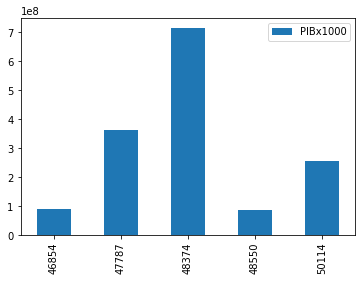

In [196]:
df2018.loc[maioresPIBs, ['Nome do Município','UF','PIBx1000']].plot.bar()

In [205]:
df2018 = df2018.rename(columns={'Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)':'PIBperCapita'})

In [207]:
df2018.head()

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,UF,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,Nome da Mesorregião,Código da Microrregião,Nome da Microrregião,Código da Região Geográfica Imediata,Nome da Região Geográfica Imediata,Município da Região Geográfica Imediata,Código da Região Geográfica Intermediária,Nome da Região Geográfica Intermediária,Município da Região Geográfica Intermediária,Código Concentração Urbana,Nome Concentração Urbana,Tipo Concentração Urbana,Código Arranjo Populacional,Nome Arranjo Populacional,Hierarquia Urbana,Hierarquia Urbana (principais categorias),Código da Região Rural,Nome da Região Rural,Região rural (segundo classificação do núcleo),Amazônia Legal,Semiárido,Cidade-Região de São Paulo,"Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)",PIBx1000,PIBperCapita,Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto
44545,2018,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,NaN,1102,Leste Rondoniense,11006,Cacoal,110005,Cacoal,do Entorno,1102,Ji-Paraná,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Local,Centro Local,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,165892.171,26369.018,123512.405,155271.086,471044.680,28261.302,499305.982,21552.47,"Administração, defesa, educação e saúde públic...",Demais serviços,"Pecuária, inclusive apoio à pecuária"
44546,2018,1,Norte,11,RO,Rondônia,1100023,Ariquemes,NaN,1102,Leste Rondoniense,11003,Ariquemes,110002,Ariquemes,Polo,1101,Porto Velho,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Subregional B,Centro Subregional,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,163120.731,339667.233,1034183.951,674541.006,2211512.920,252260.341,2463773.260,23206.36,Demais serviços,"Administração, defesa, educação e saúde públic...",Comércio e reparação de veículos automotores e...
44547,2018,1,Norte,11,RO,Rondônia,1100031,Cabixi,NaN,1102,Leste Rondoniense,11008,Colorado do Oeste,110006,Vilhena,do Entorno,1102,Ji-Paraná,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Local,Centro Local,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,62337.414,5178.976,25170.517,42163.897,134850.804,5651.465,140502.269,25837.12,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária","Agricultura, inclusive apoio à agricultura e a..."
44548,2018,1,Norte,11,RO,Rondônia,1100049,Cacoal,NaN,1102,Leste Rondoniense,11006,Cacoal,110005,Cacoal,Polo,1102,Ji-Paraná,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Subregional B,Centro Subregional,5105,Região Rural do Centro Sub-regional de Vilhena...,Região Rural de Centro Sub-regional,Sim,Não,Não,212492.509,222558.359,971609.245,548595.488,1955255.600,225198.416,2180454.016,25708.96,Demais serviços,"Administração, defesa, educação e saúde públic...",Comércio e reparação de veículos automotores e...
44549,2018,1,Norte,11,RO,Rondônia,1100056,Cerejeiras,NaN,1102,Leste Rondoniense,11008,Colorado do Oeste,110006,Vilhena,do Entorno,1102,Ji-Paraná,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro de Zona B,Centro de Zona,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,61973.278,22818.149,208728.017,109796.030,403315.475,68863.359,472178.834,28714.35,Demais serviç

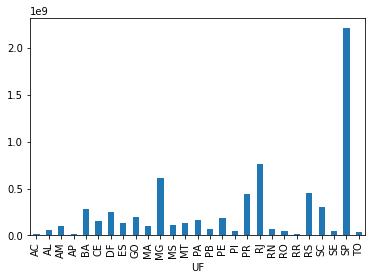

In [214]:
df2018.groupby(df2018['UF'])["PIBx1000"].sum().plot.bar()